In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pgscen.utils.data_utils import (split_actuals_hist_future,
                               split_forecasts_hist_future)

In [30]:
def load_load_data(data_path):
    
    load_zone_actual_df = pd.read_csv(
        Path(data_path, 'Load', 'Actual',
             'load_actual_1h_zone_2018_2019_utc.csv'),
        parse_dates=['Time'], index_col='Time'
        )

    load_zone_forecast_df = pd.read_csv(
        Path(data_path, 'Load', 'Day-ahead',
             'load_day_ahead_forecast_zone_2018_2019_utc.csv'),
        parse_dates=['Issue_time', 'Forecast_time']
        )

    return load_zone_actual_df, load_zone_forecast_df

In [31]:
datadir = '../data/NYISO/'

scen_start_time = pd.to_datetime('2019-08-01 06:00:00',utc=True)
scen_timesteps = pd.date_range(start=scen_start_time,periods=24, freq='H')
nscen = 1000

In [32]:
load_zone_actual_df, load_zone_forecast_df = load_load_data(datadir)

In [33]:
load_zone_actual_hist_df, load_zone_actual_future_df = \
    split_actuals_hist_future(load_zone_actual_df, scen_timesteps)

load_zone_forecast_hist_df, load_zone_forecast_future_df = \
    split_forecasts_hist_future(load_zone_forecast_df, scen_timesteps)

In [38]:
scenario_count = 1000

start_date = '2019-02-25'
scen_start_time = pd.to_datetime(' '.join([start_date, "06:00:00"]), utc=True)
print("Scenarios will start at: {}".format(scen_start_time))

Scenarios will start at: 2019-02-25 06:00:00+00:00


LOAD ACTUALS


,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST
Time,,,,,,,,,,,
2018-01-01 05:00:00+00:00,1609.3,2067.2,695.9,1152.2,1284.7,2596.1,1076.0,400.9,6073.3,664.0,1846.9
2018-01-01 06:00:00+00:00,1562.3,2024.2,668.0,1118.2,1228.1,2482.9,1041.8,394.8,5905.7,661.3,1794.2
2018-01-01 07:00:00+00:00,1540.9,1986.2,644.2,1091.1,1192.0,2384.0,1026.7,390.1,5744.7,654.4,1765.6
2018-01-01 08:00:00+00:00,1529.8,1958.1,619.6,1072.8,1190.7,2327.2,1016.1,377.4,5625.7,656.5,1763.7
2018-01-01 09:00:00+00:00,1528.9,1926.6,612.7,1072.7,1190.2,2309.9,1019.6,379.5,5572.0,660.0,1745.9



LOAD FORECASTS


,Issue_time,Forecast_time,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST
0,2017-12-31 18:00:00+00:00,2018-01-01 06:00:00+00:00,1468,1746,697,978,1125,2346,843,340,5540,617,1669
1,2017-12-31 18:00:00+00:00,2018-01-01 07:00:00+00:00,1437,1701,678,949,1094,2256,823,333,5391,615,1630
2,2017-12-31 18:00:00+00:00,2018-01-01 08:00:00+00:00,1431,1696,664,940,1080,2204,821,324,5268,616,1616
3,2017-12-31 18:00:00+00:00,2018-01-01 09:00:00+00:00,1441,1721,661,953,1084,2192,833,322,5220,620,1620
4,2017-12-31 18:00:00+00:00,2018-01-01 10:00:00+00:00,1469,1756,676,978,1102,2208,846,330,5259,632,1643


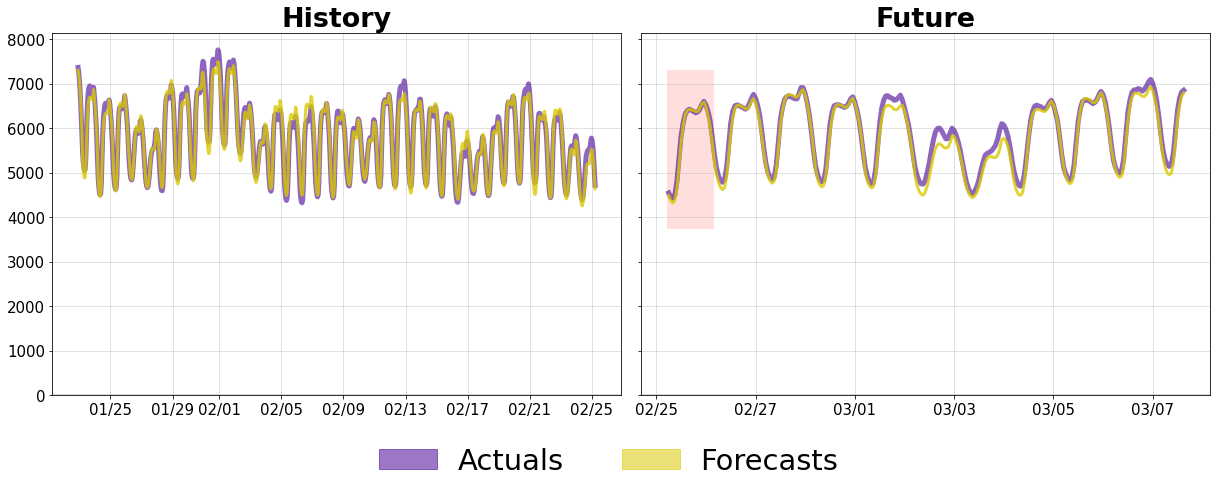

In [39]:
from pgscen.command_line import (split_actuals_hist_future, split_forecasts_hist_future)
from IPython.display import display


scen_timesteps = pd.date_range(start=scen_start_time, periods=24, freq='H')

datadir = '../data/NYISO/'
load_zone_actual_df, load_zone_forecast_df = load_load_data(datadir)

(load_zone_actual_hists,
     load_zone_actual_futures) = split_actuals_hist_future(
            load_zone_actual_df, scen_timesteps)

(load_zone_forecast_hists,
     load_zone_forecast_futures) = split_forecasts_hist_future(
            load_zone_forecast_df, scen_timesteps)

print("LOAD ACTUALS")
display(load_zone_actual_df.iloc[:5, :].round(1))
print("")
print("LOAD FORECASTS")
display(load_zone_forecast_df.iloc[:5, :].round(1))
print("")

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

%matplotlib inline
plt.rcParams['figure.figsize'] = [19, 11]

fig, (hist_ax, future_ax) = plt.subplots(figsize=(17, 6),
                                         nrows=1, ncols=2, sharey=True)

title_args = dict(weight='semibold', size=27)
actual_clr, fcst_clr = "#430093", "#D9C800"
plt_asset = 'N.Y.C.'

hist_ax.set_title("History", **title_args)
hist_ax.plot(load_zone_actual_hists[plt_asset][-800:],
             c=actual_clr, lw=5, alpha=0.6)
hist_ax.plot(load_zone_forecast_hists['Forecast_time'][-800:],
             load_zone_forecast_hists[plt_asset][-800:],
             c=fcst_clr, lw=3, alpha=0.8)

future_ax.set_title("Future", **title_args)
future_ax.plot(load_zone_actual_futures[plt_asset][:250],
               c=actual_clr, lw=5, alpha=0.6)
future_ax.plot(load_zone_forecast_futures['Forecast_time'][:250],
               load_zone_forecast_futures[plt_asset][:250],
               c=fcst_clr, lw=3, alpha=0.8)

future_ax.fill_between(load_zone_actual_futures.index[:24] - pd.Timedelta(hours=1),
                       load_zone_actual_futures[plt_asset][:24].min() - 700,
                       load_zone_actual_futures[plt_asset][:24].max() + 700,
                       facecolor='red', edgecolor='none', alpha=0.13)

for ax in [hist_ax, future_ax]:
    ax.tick_params(which='both', labelsize=15)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.grid(linewidth=0.9, alpha=0.41)
    ax.axhline(0, lw=1.3, c='black', alpha=1)
    ax.set_ylim((0, ax.get_ylim()[1]))

lgnd_ptchs = [Patch(color=actual_clr, alpha=0.53, label="Actuals"),
              Patch(color=fcst_clr, alpha=0.53, label="Forecasts")]

_ = fig.legend(handles=lgnd_ptchs, frameon=False, fontsize=29, ncol=2, loc=8,
               bbox_to_anchor=(0.5, -0.17), handletextpad=0.7)
fig.tight_layout(w_pad=1)

In [40]:
from pgscen.engine import GeminiEngine

ge = GeminiEngine(load_zone_actual_hists, load_zone_forecast_hists,
                  scen_start_time, asset_type='load')
ge.fit(asset_rho=0.05, horizon_rho=0.05)

display(ge.model.asset_cov.round(3))
display(ge.model.horizon_cov.iloc[:11, :11].round(3))

,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST
CAPITL,1.475,0.567,0.389,0.463,0.755,0.445,0.570,0.349,0.430,0.144,0.259
CENTRL,0.567,1.475,0.304,0.816,0.515,0.410,0.657,0.373,0.418,0.164,0.456
DUNWOD,0.389,0.304,1.475,0.293,0.712,0.713,0.256,0.369,0.642,0.063,0.175
GENESE,0.463,0.816,0.293,1.475,0.442,0.440,0.417,0.301,0.421,0.199,0.686
HUD VL,0.755,0.515,0.712,0.442,1.475,0.773,0.462,0.543,0.736,0.108,0.275
LONGIL,0.445,0.410,0.713,0.440,0.773,1.475,0.323,0.545,0.900,0.086,0.257
MHK VL,0.570,0.657,0.256,0.417,0.462,0.323,1.475,0.366,0.322,0.156,0.235
MILLWD,0.349,0.373,0.369,0.301,0.543,0.545,0.366,1.475,0.569,0.070,0.174
N.Y.C.,0.430,0.418,0.642,0.421,0.736,0.900,0.322,0.569,1.475,0.083,0.239
NORTH,0.144,0.164,0.063,0.199,0.108,0.086,0.156,0.070,0.083,1.475,0.098


,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
lag_0,0.677,0.623,0.600,0.572,0.521,0.465,0.418,0.372,0.337,0.315,0.299
lag_1,0.623,0.677,0.624,0.598,0.543,0.483,0.431,0.383,0.347,0.324,0.307
lag_2,0.600,0.624,0.677,0.619,0.564,0.501,0.446,0.395,0.358,0.334,0.317
lag_3,0.572,0.598,0.619,0.677,0.600,0.531,0.471,0.415,0.376,0.350,0.331
lag_4,0.521,0.543,0.564,0.600,0.677,0.591,0.518,0.453,0.408,0.378,0.356
lag_5,0.465,0.483,0.501,0.531,0.591,0.676,0.588,0.510,0.457,0.421,0.395
lag_6,0.418,0.431,0.446,0.471,0.518,0.588,0.676,0.583,0.520,0.477,0.445
lag_7,0.372,0.383,0.395,0.415,0.453,0.510,0.583,0.676,0.598,0.546,0.507
lag_8,0.337,0.347,0.358,0.376,0.408,0.457,0.520,0.598,0.676,0.606,0.562
lag_9,0.315,0.324,0.334,0.350,0.378,0.421,0.477,0.546,0.606,0.676,0.612


In [41]:
import seaborn as sns
import numpy as np
from ipywidgets import interact, FloatText
from pgscen.utils.plot_utils import get_clustermat, cov_cmap
import networkx as nx
from itertools import combinations as combn


def draw_pcor_graph(pcor_mat, asset_list, ax, plt_thresh, **nxargs):
    asset_graph = nx.Graph()

    for (i, asset1), (j, asset2) in combn(enumerate(asset_list), 2):
        if np.abs(pcor_mat[i, j]) >= plt_thresh:
            asset_graph.add_edge(asset1, asset2, pcor=pcor_mat[i, j])
    
    nx.draw(asset_graph, ax=ax, with_labels=True, 
            node_color='green', font_weight='bold',
            edge_color=[(0.10, 0.37, 1., 0.47) if val > 0 else (1., 0., 0., 0.47)
                        for val in nx.get_edge_attributes(asset_graph, 'pcor').values()],
            width=[53 * (val - plt_thresh)
                   for val in nx.get_edge_attributes(asset_graph, 'pcor').values()],
            **nxargs)

def plot_zone_covars(rho):
    ge.fit(asset_rho=rho, horizon_rho=rho)

    fig, axarr = plt.subplots(figsize=(15, 12), nrows=2, ncols=2)
    asset_clust = get_clustermat(ge.model.asset_cov)
    asset_var = asset_clust.iloc[0, 0]
    time_clust = get_clustermat(ge.model.horizon_cov)
    time_var = time_clust.iloc[0, 0]

    sns.heatmap(asset_clust, ax=axarr[0, 0],
                cmap=cov_cmap, vmin=-asset_var, vmax=asset_var, square=True)
    sns.heatmap(time_clust, ax=axarr[0, 1],
                cmap=cov_cmap, vmin=-time_var, vmax=time_var, square=True)

    asset_lbls = [asset.replace('_', ' ') for asset in asset_clust.index]
    axarr[0, 0].set_xticklabels(asset_lbls,
                                rotation=31, ha='right', size=17)
    axarr[0, 0].set_yticklabels(asset_lbls, size=17)

    time_lbls = [ge.scen_timesteps[int(lag.split('_')[1])].strftime("%H:%M")
                 for lag in time_clust.index]
    axarr[0, 1].set_xticklabels(time_lbls, rotation=90, size=13)
    axarr[0, 1].set_yticklabels(time_lbls, size=13)

    axarr[0, 0].set_title("Load Covariance\n", **title_args)
    axarr[0, 1].set_title("Timestep Covariance\n", **title_args)
    
    asset_prec = np.linalg.inv(ge.model.asset_cov)
    asset_pcor = -asset_prec / np.sqrt(np.outer(np.diag(asset_prec),
                                                np.diag(asset_prec)))
    draw_pcor_graph(asset_pcor, ge.asset_list, axarr[1, 0], 0.05, font_size=17)
    
    time_lbls = [ge.scen_timesteps[int(lag.split('_')[1])].strftime("%H")
                 for lag in ge.model.horizon_cov.index]
    time_prec = np.linalg.inv(ge.model.horizon_cov)
    time_pcor = -time_prec / np.sqrt(np.outer(np.diag(time_prec),
                                              np.diag(time_prec)))
    draw_pcor_graph(time_pcor, time_lbls, axarr[1, 1], 0.2, font_size=13)
    
    fig.tight_layout(w_pad=7)    

w = FloatText(value=0.05,
              layout={'align_self': 'center'}, style={'description_width': 'initial'},
              disabled=False)
_ = interact(plot_zone_covars, rho=w)

interactive(children=(FloatText(value=0.05, description='rho', layout=Layout(align_self='center'), style=Descr…